# Mutual Information

The following are the top features from the Ablation Study that affect the variance of a resulting model if we exclude them. We eliminated the ones that highlight the students that repeated the year such as the ones that start with PREV_, FIRST_, NEXT_, CANX, EARLY_TRANSFER. Features are in order of importance:

In [33]:
features = [
    'NUM_EARLY_LOANS',
    'EARLY_Q3_SUBS_PC',
    'FIRST_ASSIGN_GRADE',
    'NUM_GRANTS',
    'NUM_EARLY_LATES',
    'NUM_SUBJECTS',
    'NUM_MEMBERSHIPS',
    'NUM_CLUBS',
    'NUM_SOCIETIES',
    'NUM_M5_FAILS',
    'STUDENT_TYPE',
    'DAYS_TO_FIRST_LAB',
    'CAO_POINTS',
    'LC_MATHS_POINTS',
    'YEARS_SINCE_LC',
]

Importing libraries:

In [31]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from minepy import MINE
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib config:

In [7]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

Original data:

In [3]:
df = pd.read_csv('../data/data.csv', index_col=0, low_memory=False) # user IDIROID as the index

In [4]:
df.head()

,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG,REG_DATE,...,NUM_MAY_TYPE_C,NUM_MAY_TYPE_D,NUM_MAY_TYPE_E,NUM_MAY_TYPE_X,NUM_MAY_TYPE_S,EARLIEST_CRM_DATE,DAYS_TO_FIRST_CRM,PREV_NUM_CRM,Precision`Mark,Overal`Mark
IDIROID,,,,,,,,,,,,,,,,,,,,,
239,2014,1,1,N,N,N,N,N,16,2013-09-18 00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.40,71.0
243,2014,1,1,N,N,N,N,N,14,2013-09-16 00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,68.0
2408,2014,1,1,N,N,N,N,N,9,2013-09-11 00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.96,58.0
2414,2014,1,1,N,N,N,N,N,16,2013-09-18 00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.58,64.0
2415,2014,1,1,N,N,N,N,N,9,2013-09-11 00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.46,62.0


In [5]:
target = 'Precision`Mark'

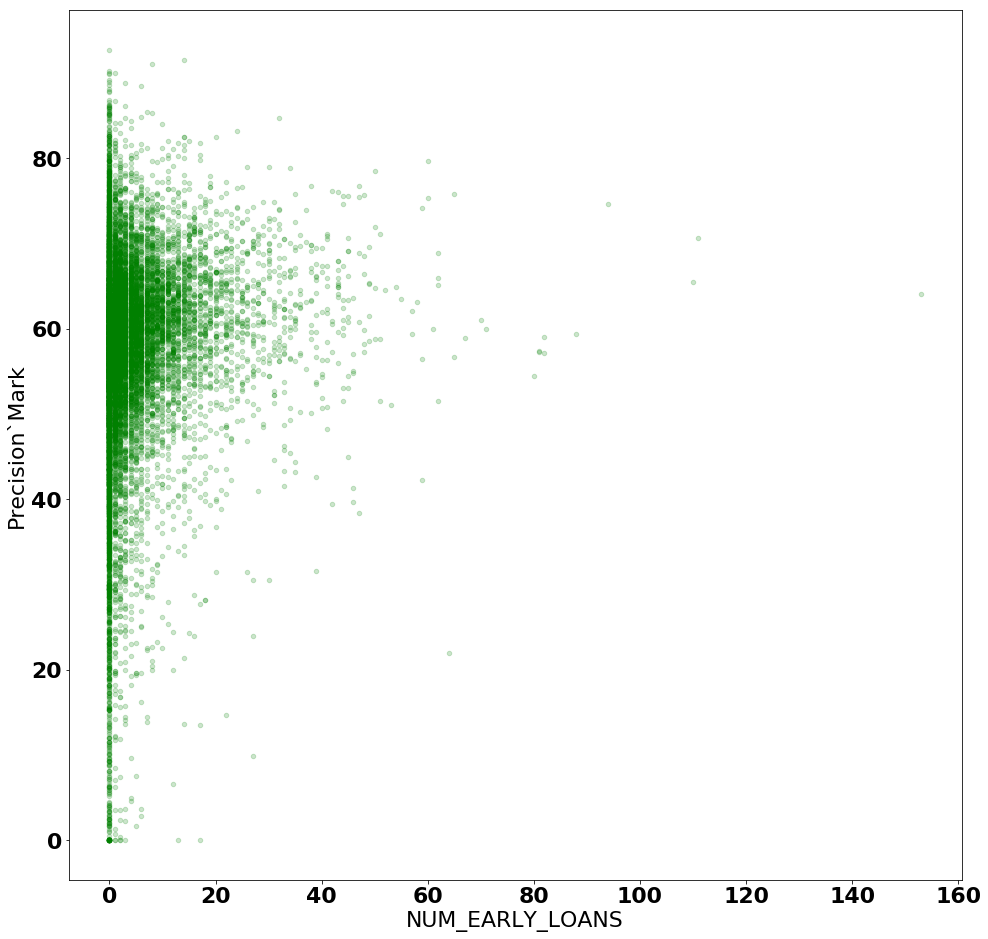

In [8]:
fig = df.plot.scatter(
    x='NUM_EARLY_LOANS', 
    y=target, 
    c='green',
    alpha=0.2,
    figsize=(16, 16)
)

In [9]:
df[
    ['NUM_EARLY_LOANS', target]
].corr() # method='pearson'

,NUM_EARLY_LOANS,Precision`Mark
NUM_EARLY_LOANS,1.000000,0.148882
Precision`Mark,0.148882,1.000000


In [10]:
df[
    ['NUM_EARLY_LOANS', target]
].corr(method='spearman')

,NUM_EARLY_LOANS,Precision`Mark
NUM_EARLY_LOANS,1.000000,0.201883
Precision`Mark,0.201883,1.000000


In [16]:
array = df[df[target].notnull()][['NUM_EARLY_LOANS', target]].values

In [17]:
array

array([[22.  , 71.4 ],
       [21.  , 68.  ],
       [ 1.  , 57.96],
       ...,
       [ 0.  , 40.83],
       [ 0.  , 28.17],
       [ 0.  , 63.92]])

In [19]:
x = array[:, 0]

In [20]:
y = array[:, 1]

In [21]:
x

array([22., 21.,  1., ...,  0.,  0.,  0.])

In [22]:
y

array([71.4 , 68.  , 57.96, ..., 40.83, 28.17, 63.92])

In [25]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, y)
mic = np.around(mine.mic(), 1)

In [27]:
mine.mic()

0.07126707545074673

In [30]:
pearsonr(x, y)

(0.1488815289609082, 3.7031272814809125e-78)

In [32]:
spearmanr(x, y)

SpearmanrResult(correlation=0.20188289298731169, pvalue=1.9939525477028854e-143)

In [36]:
cols = 3

In [37]:
rows = len(features) / cols

In [38]:
cols, rows

(3, 5.0)

In [53]:
colors = [ 
    'blue', 'green', 'red', 'purple', 'deeppink', 'orange', 'yellow', 
    'cyan', 'magenta', 'grey', 'maroon', 'lime', 'navy', 'darkcyan', 'olive',
]

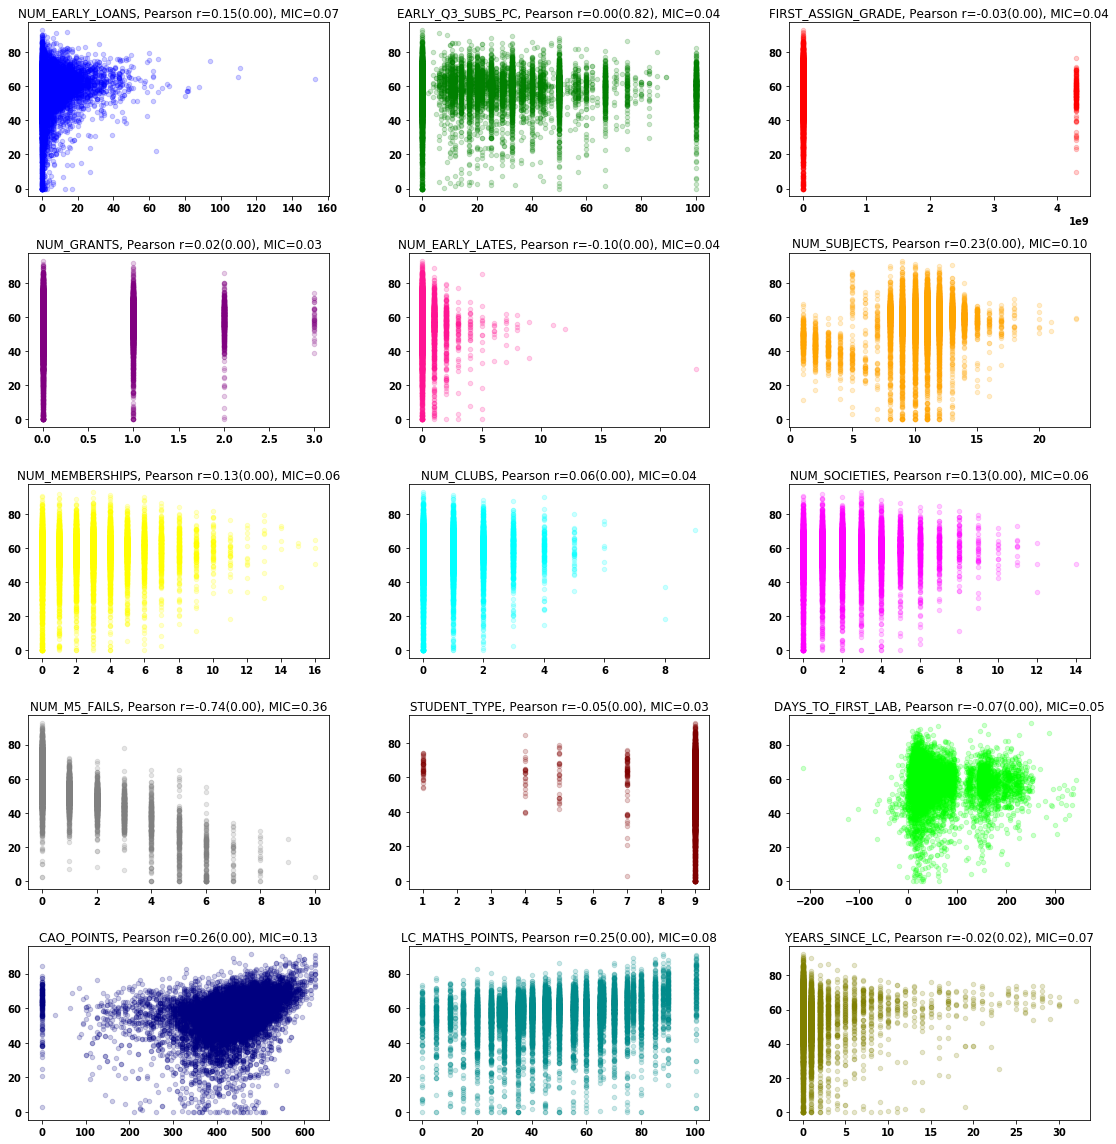

In [54]:
fig = plt.figure(figsize=(16, 16))

for i, feature in enumerate(features):
    
    # Get values
    array = df[(df[feature].notnull()) & 
               (df[target].notnull())][[feature, target]].values
    x = array[:, 0]
    y = array[:, 1]
    
    # Compute
    coef, p = pearsonr(x, y)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 2)
    text = '{}, Pearson r={:.2f}({:.2f}), MIC={:.2f}'.format(feature, coef, p, mic)
    
    # Plot
    ax = fig.add_subplot(rows, cols, i + 1)
    plt.title(text)
    df.plot.scatter(x=feature, y=target, alpha=0.2, color=colors[i], ax=ax)
    plt.xlabel('')
    plt.ylabel('')

fig.tight_layout()
plt.savefig('../figures/mutual_information_15_top_Features.png', bbox_inches="tight")